In [ ]:
!pip install mpl_toolkits

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Machine learning and clustering tools
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

# Kneedle algorithm for optimal parameter detection
from kneed import KneeLocator

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_true = iris.target 

In [3]:
print("First 5 rows of the dataset:")
print(X.head())
print("\nDataset Description:")
print(X.describe())
print("\nCheck for Missing Values:")
print(X.isnull().sum())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Dataset Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.30

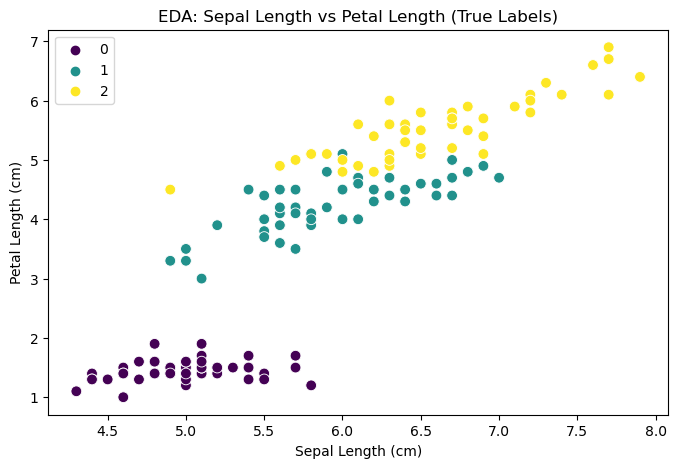

In [4]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['sepal length (cm)'], y=X['petal length (cm)'], hue=y_true, palette='viridis', s=60)
plt.title('EDA: Sepal Length vs Petal Length (True Labels)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

In [5]:
X_train, X_test, y_train_true, y_test_true = train_test_split(
    X, y_true, test_size=0.2, random_state=42, stratify=y_true
)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 120 samples
Test set size: 30 samples


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
eps_values = np.arange(0.3, 1.1, 0.1)  # Range of eps values
min_samples_values = range(3, 10)  # Range of min_samples
best_eps = 0.3
best_min_samples = 3
best_silhouette = -1
silhouette_scores = []
wcss_values = []
param_combinations = []

In [8]:
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_train_scaled)
        # Check if at least two unique labels (including noise) for silhouette score
        if len(np.unique(labels)) > 1:  # Allow noise points (-1)
            score = silhouette_score(X_train_scaled, labels)
            # Compute WCSS for non-noise points
            wcss = 0
            for cluster in np.unique(labels[labels != -1]):  # Exclude noise
                cluster_points = X_train_scaled[labels == cluster]
                if len(cluster_points) > 0:
                    centroid = np.mean(cluster_points, axis=0)
                    wcss += np.sum((cluster_points - centroid) ** 2)
            silhouette_scores.append(score)
            wcss_values.append(wcss)
            param_combinations.append((eps, min_samples, len(np.unique(labels[labels != -1]))))
            if score > best_silhouette:
                best_silhouette = score
                best_eps = eps
                best_min_samples = min_samples

In [19]:
param_combinations

[(0.3, 3, 8),
 (0.3, 4, 4),
 (0.3, 5, 3),
 (0.3, 6, 2),
 (0.3, 7, 1),
 (0.3, 8, 1),
 (0.4, 3, 10),
 (0.4, 4, 7),
 (0.4, 5, 4),
 (0.4, 6, 4),
 (0.4, 7, 2),
 (0.4, 8, 2),
 (0.4, 9, 2),
 (0.5, 3, 6),
 (0.5, 4, 4),
 (0.5, 5, 4),
 (0.5, 6, 4),
 (0.5, 7, 2),
 (0.5, 8, 2),
 (0.5, 9, 2),
 (0.6000000000000001, 3, 4),
 (0.6000000000000001, 4, 3),
 (0.6000000000000001, 5, 3),
 (0.6000000000000001, 6, 3),
 (0.6000000000000001, 7, 3),
 (0.6000000000000001, 8, 4),
 (0.6000000000000001, 9, 3),
 (0.7000000000000002, 3, 2),
 (0.7000000000000002, 4, 2),
 (0.7000000000000002, 5, 2),
 (0.7000000000000002, 6, 2),
 (0.7000000000000002, 7, 2),
 (0.7000000000000002, 8, 3),
 (0.7000000000000002, 9, 3),
 (0.8000000000000003, 3, 2),
 (0.8000000000000003, 4, 2),
 (0.8000000000000003, 5, 2),
 (0.8000000000000003, 6, 2),
 (0.8000000000000003, 7, 2),
 (0.8000000000000003, 8, 2),
 (0.8000000000000003, 9, 2),
 (0.9000000000000001, 3, 2),
 (0.9000000000000001, 4, 2),
 (0.9000000000000001, 5, 2),
 (0.9000000000000001, 6

In [9]:
print(f"\nBest parameters: eps={best_eps:.2f}, min_samples={best_min_samples}, Silhouette Score={best_silhouette:.4f}")


Best parameters: eps=1.00, min_samples=4, Silhouette Score=0.5280


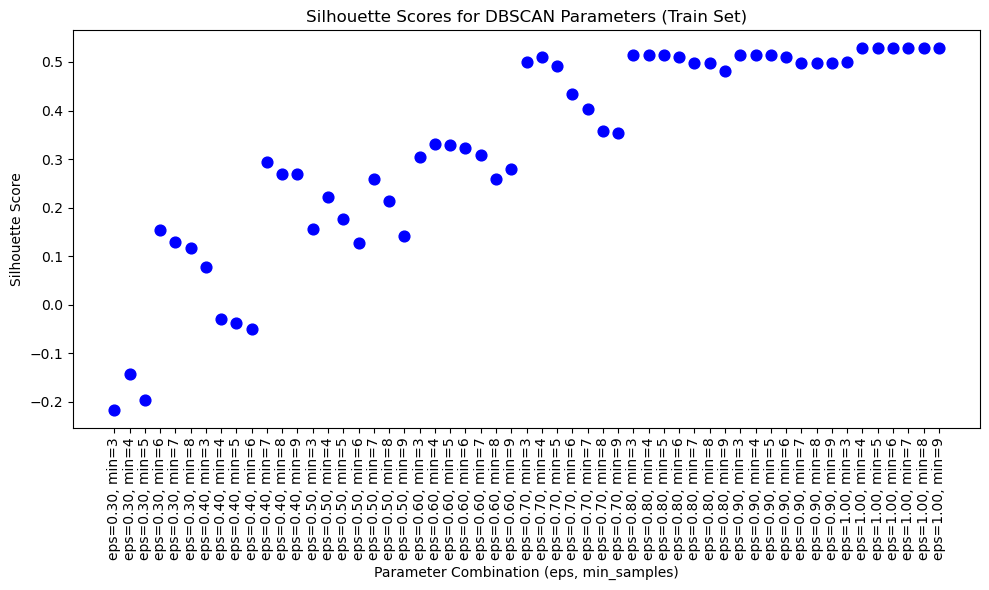

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter([f"eps={p[0]:.2f}, min={p[1]}" for p in param_combinations], silhouette_scores, c='blue', s=60)
plt.xticks(rotation=90)
plt.title('Silhouette Scores for DBSCAN Parameters (Train Set)')
plt.xlabel('Parameter Combination (eps, min_samples)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

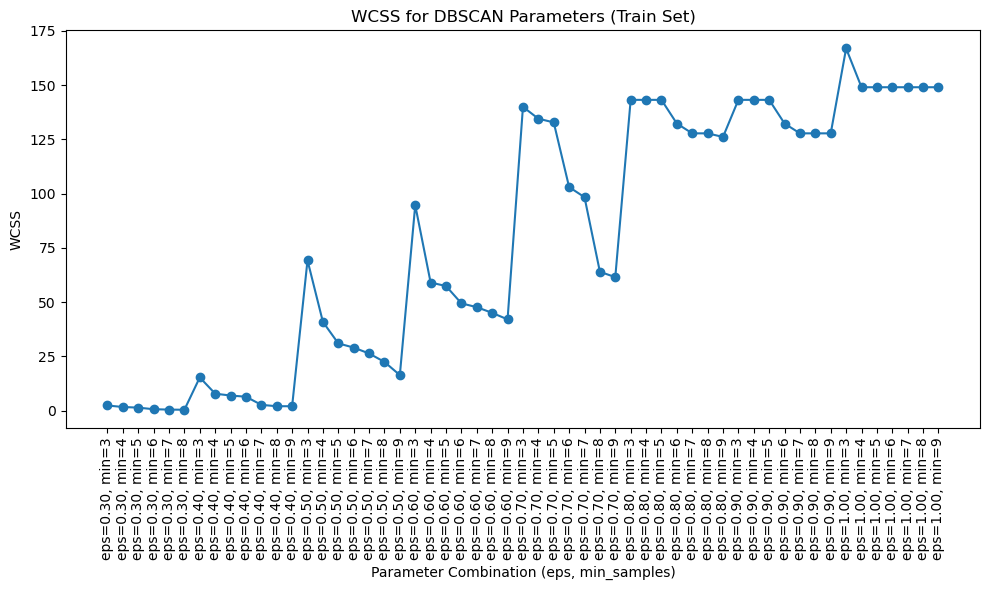

In [11]:
plt.figure(figsize=(10, 6))
plt.plot([f"eps={p[0]:.2f}, min={p[1]}" for p in param_combinations], wcss_values, marker='o')
plt.xticks(rotation=90)
plt.title('WCSS for DBSCAN Parameters (Train Set)')
plt.xlabel('Parameter Combination (eps, min_samples)')
plt.ylabel('WCSS')
plt.tight_layout()
plt.show()

In [12]:
if wcss_values:  # Ensure WCSS values exist
    knee = KneeLocator(range(len(wcss_values)), wcss_values, curve='convex', direction='decreasing')
    if knee.elbow is not None:
        optimal_idx = knee.elbow
        optimal_params = param_combinations[optimal_idx]
        print(f"\nOptimal parameters (Kneedle): eps={optimal_params[0]:.2f}, min_samples={optimal_params[1]}, Clusters={optimal_params[2]}")
    else:
        print("\nKneedle failed to find an elbow point. Using best silhouette parameters.")
else:
    print("\nNo valid WCSS values for Kneedle analysis.")


Optimal parameters (Kneedle): eps=0.30, min_samples=3, Clusters=8


In [ ]:
# Apply DBSCAN with best parameters

In [13]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
y_train_clusters = dbscan.fit_predict(X_train_scaled)
y_test_clusters = dbscan.fit_predict(X_test_scaled) 

In [ ]:
# Analyze noise points

In [14]:
noise_points_train = np.sum(y_train_clusters == -1)
noise_points_test = np.sum(y_test_clusters == -1)
print(f"\nNoise points in Train Set: {noise_points_train} ({noise_points_train/len(y_train_clusters)*100:.2f}%)")
print(f"Noise points in Test Set: {noise_points_test} ({noise_points_test/len(y_test_clusters)*100:.2f}%)")



Noise points in Train Set: 4 (3.33%)
Noise points in Test Set: 4 (13.33%)


In [15]:
ari_train = adjusted_rand_score(y_train_true, y_train_clusters)
ari_test = adjusted_rand_score(y_test_true, y_test_clusters)
print(f"\nAdjusted Rand Index (Train Set): {ari_train:.4f}")
print(f"Adjusted Rand Index (Test Set): {ari_test:.4f}")


Adjusted Rand Index (Train Set): 0.5449
Adjusted Rand Index (Test Set): 0.5197


In [16]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

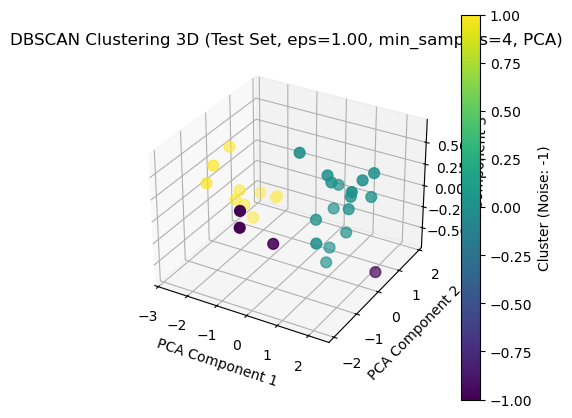

In [20]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], c=y_test_clusters, cmap='viridis', s=60, marker='o')
ax.set_title(f'DBSCAN Clustering 3D (Test Set, eps={best_eps:.2f}, min_samples={best_min_samples}, PCA)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.colorbar(scatter, ax=ax, label='Cluster (Noise: -1)')
plt.show()

In [18]:
X_train_copy = pd.DataFrame(X_train_scaled, columns=iris.feature_names)
X_train_copy['Cluster'] = y_train_clusters
print("\nMean feature values per cluster (Train Set, excluding noise):")
print(X_train_copy[X_train_copy['Cluster'] != -1].groupby('Cluster').mean())


Mean feature values per cluster (Train Set, excluding noise):
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                -1.008139          0.884933          -1.299132   
1                 0.483735         -0.439684           0.637207   

         petal width (cm)  
Cluster                    
0               -1.252377  
1                0.622693  
